In [1]:
import pandas as pd 
import numpy as np 
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
file_name='/kaggle/input/movie-genreplotposter/Movie_combined.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...


In [4]:
df = df[['Title', 'Plot','Genre']]

In [5]:
df.head()

,Title,Plot,Genre
0,the great train robbery,The film opens with two bandits breaking into ...,action
1,the suburbanite,The film is about a family who move to the sub...,comedy
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy
3,the adventures of dollie,On a beautiful summer day a father and mother ...,drama
4,the black viper,A thug accosts a girl as she leaves her workpl...,drama


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   17303 non-null  object
 1   Plot    17303 non-null  object
 2   Genre   17303 non-null  object
dtypes: object(3)
memory usage: 405.7+ KB


In [7]:
df.describe()

,Title,Plot,Genre
count,17303,17303,17303
unique,16620,16584,6
top,prey,"At night, a carnivorous, shape-shifting alien ...",drama
freq,9,9,5793


In [8]:
duplicates = df.duplicated()
print(df[duplicates])

                    Title                                               Plot  \
33             the escape  The film begins with a short prologue explaini...   
34             the escape  The film begins with a short prologue explaini...   
86     great expectations  A young boy, Pip, runs into an escaped convict...   
112              the cook  Fatty is the head chef at the "Bull Pup" resta...   
202                  love  A young woman, Natalie Storm (played by Glaum)...   
...                   ...                                                ...   
17236               quick  Seoul, 2004. A group of bikers are joy-riding ...   
17240               blind  A missing person case involving a female unive...   
17241               blind  A missing person case involving a female unive...   
17279               honey  In the remote and undeveloped eastern Black Se...   
17280               honey  In the remote and undeveloped eastern Black Se...   

          Genre  
33        drama  
34 

In [9]:
df = df.drop_duplicates()

# Verify results
print("Duplicates removed. Number of rows:", len(df))

Duplicates removed. Number of rows: 16644


In [10]:
num_unique_genres = df['Genre'].nunique()
print("Number of unique genres:", num_unique_genres)

Number of unique genres: 6


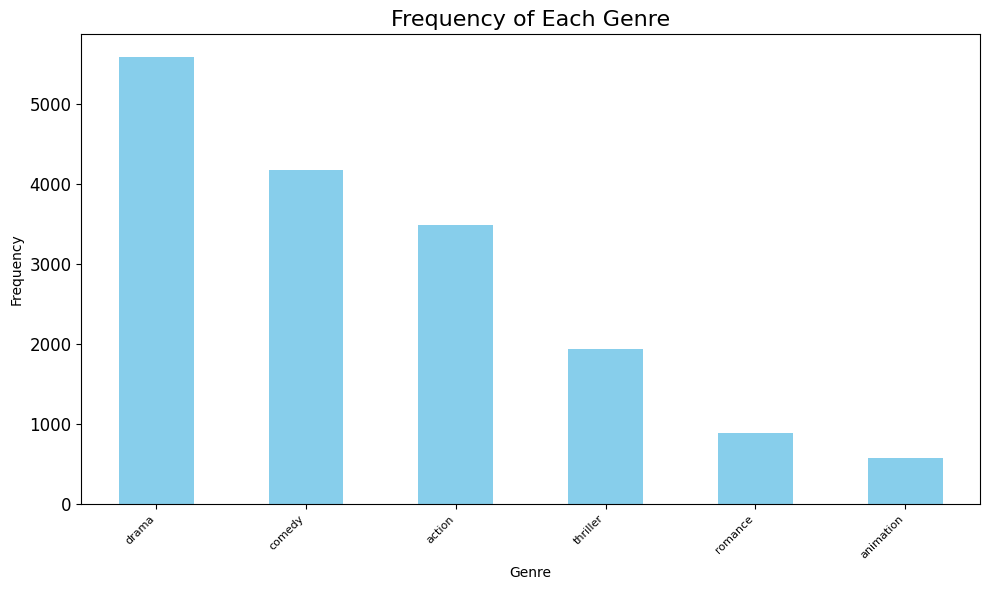

In [11]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Genre', fontsize=16)  # Set title font size
plt.xlabel('Genre', fontsize=10)  # Set x-axis label font size
plt.ylabel('Frequency', fontsize=10)  # Set y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and set x-axis tick label font size
plt.yticks(fontsize=12)  # Set y-axis tick label font size
plt.tight_layout()
plt.show()

In [12]:
Counter(df["Title"]).most_common()

[('angel', 4),
 ('romance', 3),
 ('godzilla', 3),
 ('darling', 3),
 ('i love you', 3),
 ('love', 2),
 ('the valiant', 2),
 ('welcome home', 2),
 ('oh, what a night', 2),
 ('i, the jury', 2),
 ('another time, another place', 2),
 ('tarzan, the ape man', 2),
 ('see no evil', 2),
 ('the karate kid', 2),
 ('mother', 2),
 ('war', 2),
 ('london', 2),
 ('the importance of being earnest', 2),
 ('the great train robbery', 1),
 ('the suburbanite', 1),
 ('how brown saw the baseball game', 1),
 ('the adventures of dollie', 1),
 ('the black viper', 1),
 ('a calamitous elopement', 1),
 ('the fight for freedom', 1),
 ('at the altar', 1),
 ("a drunkard's reformation", 1),
 ('the golden louis', 1),
 ('an arcadian maid', 1),
 ('hemlock hoax, the detective', 1),
 ('the house with closed shutters', 1),
 ('a lad from old ireland', 1),
 ('the black arrow: a tale of the two roses', 1),
 ('brown of harvard', 1),
 ('sweet memories', 1),
 ('the musketeers of pig alley', 1),
 ('petticoat camp', 1),
 ('put yourse

In [13]:
Counter(df["Plot"].apply(lambda x: x[:50])).most_common()

[('The plot revolves around the players on a hockey t', 4),
 ('Jaihind is the journey of five people, linked by o', 3),
 ('Hoppity the Grasshopper, after a period spent away', 2),
 ('Eastern school teacher Catherine Allen becomes not', 2),
 ('Captain Phillip Donlin (Lloyd Bridges) and his sma', 2),
 ('Jack Flynn is driving down a highway at night, loo', 2),
 ('Paul Winchell plays a father to Jerry Mahoney who ', 2),
 ('Herbert H. Heebert (Jerry Lewis) is a young man wh', 2),
 ('A 38-year-old writer of pornographic novels named ', 2),
 ('In the fictional country of Lugash, a mysterious t', 2),
 ('Following the grisly suicide of the U.S. Ambassado', 2),
 ('By the end of the 19th century, Butch Cassidy, the', 2),
 ('Bill Markham (Powers Boothe) is an engineer who ha', 2),
 ('Ben White (Reb Brown) attends the funeral of his s', 2),
 ('As noted above, Jackie Chan re-edited The Protecto', 2),
 ('We see the origin of Pinhead as a British military', 2),
 ('While on a routine patrol on United S

In [14]:
df[df["Plot"].str.contains("The plot revolves around the players on a hockey t")]

,Title,Plot,Genre
13302,les boys,The plot revolves around the players on a hock...,comedy
13307,les boys ii,The plot revolves around the players on a hock...,comedy
13343,les boys iii,The plot revolves around the players on a hock...,comedy
13385,les boys iv,The plot revolves around the players on a hock...,comedy


In [15]:
Counter(df["Genre"]).most_common()

[('drama', 5590),
 ('comedy', 4170),
 ('action', 3482),
 ('thriller', 1935),
 ('romance', 888),
 ('animation', 579)]

In [16]:
labels = list(set(df["Genre"]))
labels

['drama', 'comedy', 'animation', 'romance', 'thriller', 'action']

In [17]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
label2id

{'drama': 0,
 'comedy': 1,
 'animation': 2,
 'romance': 3,
 'thriller': 4,
 'action': 5}

In [18]:
# Check the number of unique genres in df_20["genre"]
num_unique_genres = df["Genre"].nunique()

# Check the number of unique labels in the label2id mapping
num_unique_labels = len(label2id)

# Ensure consistency
if num_unique_genres != num_unique_labels:
    raise ValueError("Number of unique genres in df_20 does not match the number of unique labels in the label2id mapping.")

# If they match, proceed with creating the "label" column
df["label"] = df["Genre"].apply(lambda x: label2id[x])


In [19]:
df.head()

,Title,Plot,Genre,label
0,the great train robbery,The film opens with two bandits breaking into ...,action,5
1,the suburbanite,The film is about a family who move to the sub...,comedy,1
2,how brown saw the baseball game,Before heading out to a baseball game at a nea...,comedy,1
3,the adventures of dollie,On a beautiful summer day a father and mother ...,drama,0
4,the black viper,A thug accosts a girl as she leaves her workpl...,drama,0


In [20]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42) 

In [21]:
from datasets import Features, ClassLabel, Value, Dataset, DatasetDict

# Define the schema to match your DataFrame columns
ds_features = Features({
    "Title": Value("string"),
    "Plot": Value("string"),
    "Genre": Value("string"),
    "label": ClassLabel(names=labels)
})

# Create the Dataset from your DataFrame with the updated schema
dataset = DatasetDict({
    "train": Dataset.from_pandas(df_train.reset_index(drop=True), features=ds_features),
    "valid": Dataset.from_pandas(df_val.reset_index(drop=True), features=ds_features),
    "test": Dataset.from_pandas(df_test.reset_index(drop=True), features=ds_features)
})

dataset


DatasetDict({
    train: Dataset({
        features: ['Title', 'Plot', 'Genre', 'label'],
        num_rows: 9986
    })
    valid: Dataset({
        features: ['Title', 'Plot', 'Genre', 'label'],
        num_rows: 3329
    })
    test: Dataset({
        features: ['Title', 'Plot', 'Genre', 'label'],
        num_rows: 3329
    })
})

In [22]:
Counter(df["Genre"]).most_common()

[('drama', 5590),
 ('comedy', 4170),
 ('action', 3482),
 ('thriller', 1935),
 ('romance', 888),
 ('animation', 579)]

In [26]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [27]:
def tokenize(batch):
    return tokenizer(batch["Plot"], padding=True, truncation=True)

In [28]:
from datasets import load_dataset
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [29]:
print(dataset_encoded["train"].column_names)

['Title', 'Plot', 'Genre', 'label', 'input_ids', 'token_type_ids', 'attention_mask']


In [30]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(labels)

config = (AutoConfig
          .from_pretrained(model_ckpt, num_labels=num_labels, 
                           label2id=label2id, id2label=id2label))

model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, config=config)
         .to(device))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [33]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=4,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
#                                   push_to_hub=True, 
                                  log_level="error",
                                  save_total_limit=1)

2024-02-18 02:26:50.037624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 02:26:50.037728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 02:26:50.323077: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [34]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["valid"],
                  tokenizer=tokenizer)
trainer.train();

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.902531,0.665966,0.652486
2,0.953800,0.850397,0.685191,0.681445
3,0.953800,0.876272,0.686392,0.684821
4,0.532100,0.898147,0.687293,0.684337


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

In [35]:
preds_output = trainer.predict(dataset_encoded["valid"])

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [36]:
preds_output.metrics

{'test_loss': 0.898147463798523,
 'test_accuracy': 0.6872934815259838,
 'test_f1': 0.684336972258498,
 'test_runtime': 65.3512,
 'test_samples_per_second': 50.94,
 'test_steps_per_second': 1.607}

In [37]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(df_val["label"])

In [38]:
print(classification_report(y_valid,y_preds, target_names=labels))

              precision    recall  f1-score   support

       drama       0.68      0.72      0.70      1131
      comedy       0.73      0.68      0.70       813
   animation       0.80      0.75      0.77       122
     romance       0.50      0.31      0.39       181
    thriller       0.62      0.66      0.64       373
      action       0.70      0.75      0.72       709

    accuracy                           0.69      3329
   macro avg       0.67      0.64      0.65      3329
weighted avg       0.68      0.69      0.68      3329



In [39]:
text = "Thor enlists the help of Valkyrie, Korg and ex-girlfriend Jane Foster to fight Gorr the God Butcher, who intends to make the gods extinct."

encoding = tokenizer(text,  padding=True, truncation=True, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [40]:
logits = outputs.logits
logits.shape

torch.Size([1, 6])

In [41]:
predictions = torch.nn.functional.softmax(logits.squeeze().cpu(), dim=-1)
predictions

tensor([0.0120, 0.0584, 0.0386, 0.0055, 0.0336, 0.8519],
       grad_fn=<SoftmaxBackward0>)

In [42]:
id2label[int(predictions.argmax())]

'action'

In [43]:
text = "After first meeting at a summer camp together with their parents, Emma Kurtzman and Adam Franklin run into each other a few times as independent people but never keep in touch. Emma is a doctor in Los Angeles, and Adam is a production assistant for a musical television show. "

encoding = tokenizer(text,  padding=True, truncation=True, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [44]:
logits = outputs.logits
logits.shape

torch.Size([1, 6])

In [45]:
predictions = torch.nn.functional.softmax(logits.squeeze().cpu(), dim=-1)
predictions

tensor([0.0404, 0.9259, 0.0055, 0.0234, 0.0029, 0.0019],
       grad_fn=<SoftmaxBackward0>)

In [46]:
id2label[int(predictions.argmax())]

'comedy'

In [47]:
text = "Matthew is an American exchange student who has come to Paris to study French. While at the Cinémathèque Française protesting the firing of Henri Langlois, he meets the free-spirited twins Théo and Isabelle. The three bond over a shared love of film. After dinner with their parents, Théo and Isabelle offer Matthew the chance to stay with them while their parents are on a trip. Matthew accepts, considering them his first French friends. "

encoding = tokenizer(text,  padding=True, truncation=True, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [48]:
logits = outputs.logits
logits.shape

torch.Size([1, 6])

In [49]:
predictions = torch.nn.functional.softmax(logits.squeeze().cpu(), dim=-1)
predictions

tensor([0.7530, 0.1671, 0.0043, 0.0634, 0.0070, 0.0051],
       grad_fn=<SoftmaxBackward0>)

In [50]:
id2label[int(predictions.argmax())]

'drama'